$$Y_i = b_0 + b_1 X_{1i} + b_2 X_{2i} + \epsilon_i$$
$$TCS_i = b_0 + b_1 NIFTY_{i} + b_2 CNXIT_{i} + \epsilon_i$$

In [ ]:
from pandas_datareader import data


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
tcs = data.DataReader('TCS.NS', 'yahoo', start='2015/01/01', end='2020/09/14')
tcs = tcs.resample('M').last().pct_change()
tcs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.039130,0.059231,0.038560,0.072641,-0.505385,0.072641
2015-03-31,-0.039735,-0.036426,-0.033842,-0.040723,-0.156513,-0.040723
2015-04-30,-0.030917,-0.037247,-0.034809,-0.035334,0.540178,-0.035334
2015-05-31,0.063695,0.070100,0.055242,0.059504,0.183378,0.059504


In [ ]:
nifty = data.DataReader('^NSEI', 'yahoo', start='2015/01/01', end='2020/09/14')
nifty = nifty.resample('M').last().pct_change()
nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,-0.015522,-0.006570,-0.029689,0.004053,-0.066592,0.004053
2015-03-31,-0.034606,-0.030204,-0.023129,-0.039979,-0.329860,-0.039979
2015-04-30,-0.037548,-0.036597,-0.035543,-0.036450,0.601077,-0.036450
2015-05-31,0.026065,0.019761,0.012475,0.030820,0.359357,0.030820


In [ ]:
cnxit = data.DataReader('^CNXIT', 'yahoo', start='2015/01/01', end='2020/09/14')
cnxit = cnxit.resample('M').last().pct_change()
cnxit.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.060414,0.060185,0.059167,0.061806,NaN,0.061806
2015-03-31,-0.029520,-0.034537,-0.028151,-0.037591,NaN,-0.037591
2015-04-30,-0.086530,-0.087562,-0.092117,-0.081817,NaN,-0.081817
2015-05-31,0.044527,0.041734,0.036607,0.043324,NaN,0.043324


In [ ]:
data = {'tcs':tcs['Adj Close'], 'nifty':nifty['Adj Close'], 'cnxit':cnxit['Adj Close']}


In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,tcs,nifty,cnxit
Date,,,
2015-01-31,NaN,NaN,NaN
2015-02-28,0.072641,0.004053,0.061806
2015-03-31,-0.040723,-0.039979,-0.037591
2015-04-30,-0.035334,-0.036450,-0.081817
2015-05-31,0.059504,0.030820,0.043324


In [ ]:
df = df.dropna()
df.head()

,tcs,nifty,cnxit
Date,,,
2015-02-28,0.072641,0.004053,0.061806
2015-03-31,-0.040723,-0.039979,-0.037591
2015-04-30,-0.035334,-0.036450,-0.081817
2015-05-31,0.059504,0.030820,0.043324
2015-06-30,-0.004400,-0.007725,-0.046449


In [ ]:
import statsmodels.api as sm


In [ ]:
from patsy import dmatrices


In [ ]:
y, X = dmatrices('tcs ~ nifty + cnxit', data=df, return_type='dataframe')

In [ ]:
y.head()


,tcs
Date,
2015-02-28,0.072641
2015-03-31,-0.040723
2015-04-30,-0.035334
2015-05-31,0.059504
2015-06-30,-0.004400


In [ ]:
X.head()


,Intercept,nifty,cnxit
Date,,,
2015-02-28,1.0,0.004053,0.061806
2015-03-31,1.0,-0.039979,-0.037591
2015-04-30,1.0,-0.036450,-0.081817
2015-05-31,1.0,0.030820,0.043324
2015-06-30,1.0,-0.007725,-0.046449


In [ ]:
y = df['tcs']


In [ ]:
X = df[['nifty', 'cnxit']]


In [ ]:
y.head()


Date
2015-02-28    0.072641
2015-03-31   -0.040723
2015-04-30   -0.035334
2015-05-31    0.059504
2015-06-30   -0.004400
Freq: M, Name: tcs, dtype: float64

In [ ]:
X.head()


,nifty,cnxit
Date,,
2015-02-28,0.004053,0.061806
2015-03-31,-0.039979,-0.037591
2015-04-30,-0.036450,-0.081817
2015-05-31,0.030820,0.043324
2015-06-30,-0.007725,-0.046449


In [ ]:
X = sm.add_constant(X)


In [ ]:
X.head()


,const,nifty,cnxit
Date,,,
2015-02-28,1.0,0.004053,0.061806
2015-03-31,1.0,-0.039979,-0.037591
2015-04-30,1.0,-0.036450,-0.081817
2015-05-31,1.0,0.030820,0.043324
2015-06-30,1.0,-0.007725,-0.046449


In [ ]:
model = sm.OLS(y, X)


In [ ]:
results = model.fit()


In [ ]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tcs   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     14.26
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           7.31e-06
Time:                        07:59:51   Log-Likelihood:                 100.12
No. Observations:                  68   AIC:                            -194.2
Df Residuals:                      65   BIC:                            -187.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.007      1.504      0.137      -0.003       0.024
nifty          0.7193      0.135      5.314      0.000       0.449       0.990
cnxit          0.0041      0.007      0.625      0.534      -0.009       0.017
==============================================================================
Omnibus:                        5.925   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.075
Skew:                           0.568   Prob(JB):                       0.0791
Kurtosis:                       3.708   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.params[1]


0.7193218529737551

In [ ]:
results.params[2]


0.004147633331807593

In [ ]:
dof = 33


In [ ]:
from scipy import stats


In [ ]:
stats.t.isf(0.025, dof)


2.0345152974493383

In [ ]:
(results.params[1]-0)/results.bse[1]


5.314138525127452

In [ ]:
(results.params[2]-0)/results.bse[2]


0.6254669955176366

####Heteroskedasticity

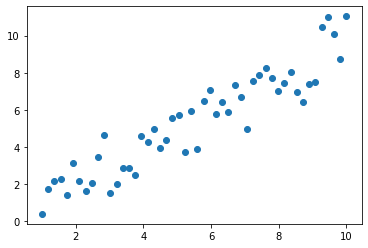

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
z = np.linspace(1, 10, 50)
a = []
for i in z:
    v = i + np.random.normal()
    a.append(v)
plt.scatter(z, a)

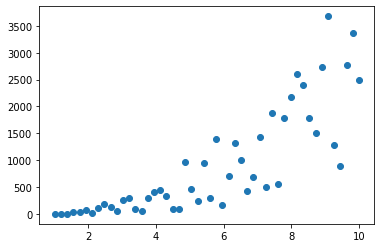

In [ ]:
z = np.linspace(1, 10, 50)
a = []
c = 1
for i in z:
    v = i*c*np.random.randint(low=1, high=10)
    a.append(v)
    c =  c + 1
plt.scatter(z, a)


####Breusch Pagan Test
$$nR^2$$
$$df = number \ of \  IVs$$



In [ ]:
X.head()


,const,nifty,cnxit
Date,,,
2015-02-28,1.0,0.004053,0.061806
2015-03-31,1.0,-0.039979,-0.037591
2015-04-30,1.0,-0.036450,-0.081817
2015-05-31,1.0,0.030820,0.043324
2015-06-30,1.0,-0.007725,-0.046449


In [ ]:
residuals = results.resid**2


In [ ]:
model_2 = sm.OLS(residuals, X)


In [ ]:
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6468
Date:                Tue, 15 Sep 2020   Prob (F-statistic):              0.527
Time:                        08:07:29   Log-Likelihood:                 263.53
No. Observations:                  68   AIC:                            -521.1
Df Residuals:                      65   BIC:                            -514.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.001      4.855      0.000       0.002       0.004
nifty          0.0119      0.012      0.971      0.335      -0.013       0.036
cnxit         -0.0003      0.001     -0.576      0.566      -0.002       0.001
==============================================================================
Omnibus:                       82.256   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              965.105
Skew:                           3.550   Prob(JB):                    2.69e-210
Kurtosis:                      20.035   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
68 * 0.020


1.36

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(results.resid, results.model.exog)
bp_test

(1.3269364531452927, 0.5150618818665964, 0.6468194565098325, 0.527046205592188)

####Multicollinearity

In [ ]:
df.head()


,tcs,nifty,cnxit
Date,,,
2015-02-28,0.072641,0.004053,0.061806
2015-03-31,-0.040723,-0.039979,-0.037591
2015-04-30,-0.035334,-0.036450,-0.081817
2015-05-31,0.059504,0.030820,0.043324
2015-06-30,-0.004400,-0.007725,-0.046449


In [ ]:
from pandas_datareader import data
bk = data.DataReader('^NSEBANK', 'yahoo', start='2015/01/01', end='2020/09/14')
bk = bk.resample('M').last().pct_change()
bk.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,-0.072143,-0.054611,-0.094220,-0.038763,NaN,-0.038763
2015-03-31,-0.032441,-0.026604,-0.012624,-0.045500,NaN,-0.045500
2015-04-30,-0.003377,0.002415,-0.009135,0.005273,NaN,0.005273
2015-05-31,0.017323,0.014232,0.012632,0.022876,NaN,0.022876


In [ ]:
df = df.join(bk['Adj Close'])
df.head()

,tcs,nifty,cnxit,Adj Close
Date,,,,
2015-02-28,0.072641,0.004053,0.061806,-0.038763
2015-03-31,-0.040723,-0.039979,-0.037591,-0.045500
2015-04-30,-0.035334,-0.036450,-0.081817,0.005273
2015-05-31,0.059504,0.030820,0.043324,0.022876
2015-06-30,-0.004400,-0.007725,-0.046449,-0.022715


In [ ]:
df = df.rename(columns={'Adj Close': 'bk'})
df.head()

,tcs,nifty,cnxit,bk
Date,,,,
2015-02-28,0.072641,0.004053,0.061806,-0.038763
2015-03-31,-0.040723,-0.039979,-0.037591,-0.045500
2015-04-30,-0.035334,-0.036450,-0.081817,0.005273
2015-05-31,0.059504,0.030820,0.043324,0.022876
2015-06-30,-0.004400,-0.007725,-0.046449,-0.022715


In [ ]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tcs   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     14.26
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           7.31e-06
Time:                        08:13:55   Log-Likelihood:                 100.12
No. Observations:                  68   AIC:                            -194.2
Df Residuals:                      65   BIC:                            -187.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0105      0.007      1.504      0.137      -0.003       0.024
nifty          0.7193      0.135      5.314      0.000       0.449       0.990
cnxit          0.0041      0.007      0.625      0.534      -0.009       0.017
==============================================================================
Omnibus:                        5.925   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.075
Skew:                           0.568   Prob(JB):                       0.0791
Kurtosis:                       3.708   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_3, X_3 = dmatrices('tcs ~ nifty + cnxit + bk', data=df, return_type='dataframe')


In [ ]:
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tcs   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     15.52
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.08e-07
Time:                        08:14:47   Log-Likelihood:                 106.33
No. Observations:                  68   AIC:                            -204.7
Df Residuals:                      64   BIC:                            -195.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0104      0.006      1.615      0.111      -0.002       0.023
nifty          1.3295      0.211      6.301      0.000       0.908       1.751
cnxit         -0.0011      0.006     -0.168      0.867      -0.014       0.011
bk            -0.5284      0.148     -3.582      0.001      -0.823      -0.234
==============================================================================
Omnibus:                        8.408   Durbin-Watson:                   2.615
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.127
Skew:                           0.671   Prob(JB):                       0.0172
Kurtosis:                       4.033   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from pandas.plotting import scatter_matrix


In [ ]:
import matplotlib.pyplot as plt


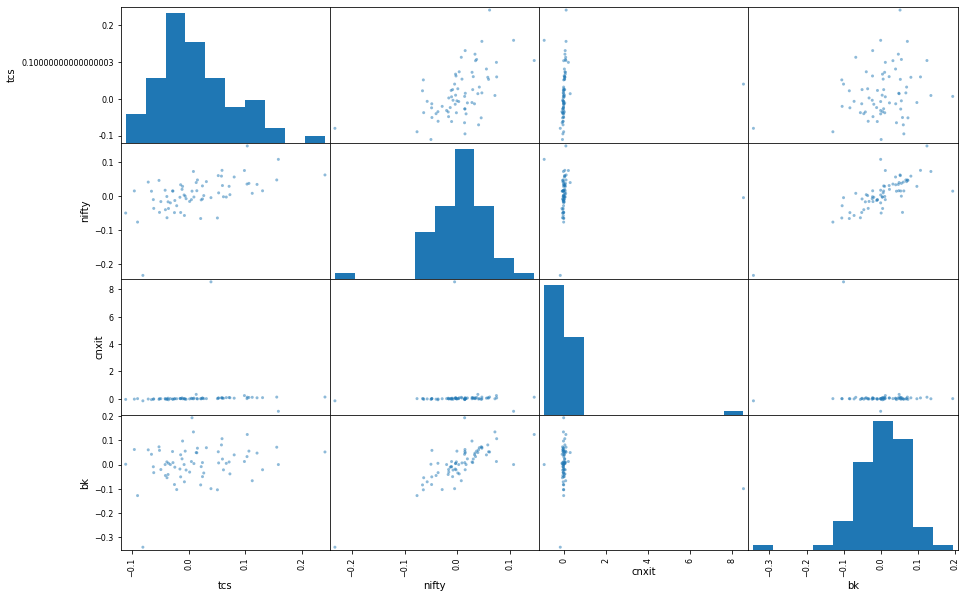

In [ ]:
scatter_matrix(df[['tcs', 'nifty', 'cnxit', 'bk']], figsize=(15, 10))
plt.show()
